In [228]:
import librosa as lr
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from matrixprofile import matrixProfile
import ffmpeg
from sklearn.preprocessing import normalize
import mass_ts as mts
from scipy.fft import fft, ifft
import numpy as np

In [9]:
x, sr = lr.core.load('out.mp3', sr=22050//4)
good_x, good_sr = lr.core.load('samples/v1/good_audio2.mp3', sr=sr)

/home/will/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/will/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [223]:
def clean_track(track, samp = sr):
    ff_track = fft(track)
    freq_track = np.fft.fftfreq(len(track), d=1/samp)
    ff_track[(freq_track >= 4000) | (freq_track < 300)] = 0
    recon_track = np.real(ifft(ff_track))
    return recon_track

def sim(main, query):
#     batch_sz = sr * 10
    batch_sz = len(main) // 10
#     idxs, dists = mts.mass2_batch(main, query, batch_size=len(query), top_matches=len(main) // len(query) - 1, n_jobs=16)
    idxs, dists = mts.mass2_batch(main, query, batch_size=batch_sz, top_matches=len(main) // batch_sz - 1, n_jobs=16)
    return idxs[np.argsort(dists)]

5512

In [47]:
ff_x = fft(x)

In [52]:
ff_good = fft(good_x)

In [53]:
freq_x = np.fft.fftfreq(len(ff_x), d=1/sr)

In [58]:
ff_picked = ff_x[(freq_x < 4000) | (freq_x >= 300)]

In [90]:
recon_good = clean_track(good_x)
recon_x = clean_track(x)

In [146]:
27560 / sr

5.0

In [224]:
idxs = sim(recon_good, recon_x[27*sr:32*sr])

In [227]:
idxs / sr

array([22.5324746 , 89.99655298, 33.58744557,  0.46335269, 10.80297533,
       80.92997097, 63.59615385, 52.57129898, 44.40493469])

In [226]:
np.array(idxs, dtype='float')[0]

124199.0

In [176]:
idxs / sr

array([20., 58., 24., 47., 13.,  4., 65., 19., 87., 82., 45., 39., 48.,
       33., 18., 38., 84., 98., 79., 42., 31., 71., 90., 81., 77., 49.,
       59., 56., 93., 57., 36., 80., 17.,  8., 23.,  2., 37., 15., 40.,
       44.,  1., 14., 83., 60., 92., 95., 27., 85.,  7., 97., 51., 32.,
       66., 54., 10., 53., 72.,  6., 50., 89., 28., 67., 55., 21., 94.,
       68., 75., 29., 16., 86., 43., 69., 96.,  3., 11., 41., 34., 26.,
       46., 35.,  5., 70., 61., 91., 52., 25., 30., 64., 88., 63., 76.,
        9., 73., 22., 74.,  0., 62., 78.])

In [202]:
res, dists = sim(good_x, x[27*sr:32*sr])

ValueError: too many values to unpack (expected 2)

In [155]:
res / sr

array([20.])

In [156]:
res / sr

array([20.])

In [91]:
corr = np.correlate(recon_good, recon_x)

In [92]:
corr.shape

(16548,)

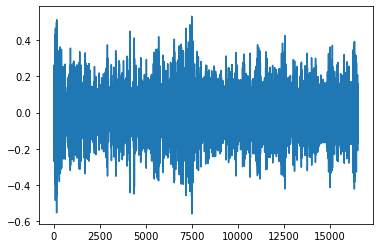

In [94]:
plt.plot(corr)

In [103]:
np.argsort(corr) / sr

array([1.36175617, 0.02793904, 1.36193759, ..., 0.029209  , 0.02902758,
       1.36066763])

In [221]:
ipd.Audio(x[27*sr+20*sr:], rate=sr)

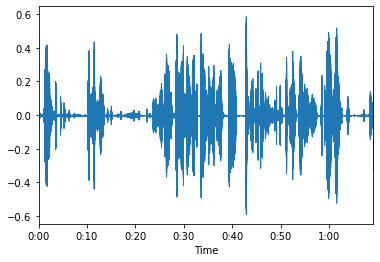

In [215]:
lr.display.waveplot(x[27*sr:], sr=sr)

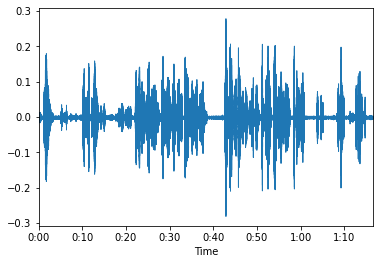

In [216]:
lr.display.waveplot(good_x[124199:], sr=sr)

In [222]:
ipd.Audio(good_x[124199+20*sr:], rate=sr)

In [86]:
ipd.Audio(recon_good, rate=sr)

In [89]:
ipd.Audio(recon_x, rate=sr)

In [45]:
ipd.Audio(norm_good_x[sr * 15:sr*20], rate=sr)

In [15]:
norm_x = normalize(x.reshape(1, -1)).ravel()
norm_good_x = normalize(good_x.reshape(1, -1)).ravel()

In [14]:
norm_x.shape

(1, 530034)

In [31]:
distances = mts.mass2_batch(norm_good_x, x[sr * 11:sr*12], batch_size=len(x[sr * 10:sr*15]), top_matches=15, n_jobs=16)

In [38]:
ipd.Audio(x[sr * 11:sr*15], rate=sr)

In [40]:
ipd.Audio(good_x[sr * 11:sr*15], rate=sr)

In [35]:
ipd.Audio(x[sr * 12:sr*13], rate=sr)

In [ ]:
x[sr * 11:sr*12],

In [32]:
distances[0] / sr

array([30.31440493,  3.46044993, 87.77539913, 83.99219884, 61.45772859,
        6.52775762, 92.48276488, 42.74945573, 37.81621916, 28.74764151,
       18.15820029, 21.75907112, 67.18269231, 72.31513062, 58.8733672 ])

In [33]:
distances[0] / sr

array([30.31440493,  3.46044993, 87.77539913, 83.99219884, 61.45772859,
        6.52775762, 92.48276488, 42.74945573, 37.81621916, 28.74764151,
       18.15820029, 21.75907112, 67.18269231, 72.31513062, 58.8733672 ])

In [26]:
distances[1]

array([232.9697029 -6.25712860e-17j, 233.41839636-2.22976836e-17j,
       232.29073825+3.37596366e-18j, 233.596576  -4.72819909e-16j,
       233.61023277-4.04939640e-16j])

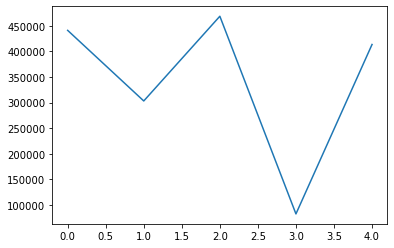

In [22]:
plt.plot(distances[0])

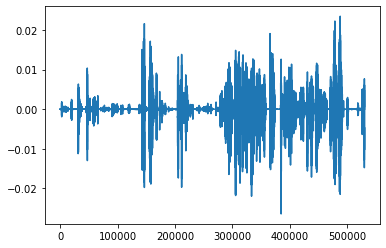

In [17]:
plt.plot(norm_x)

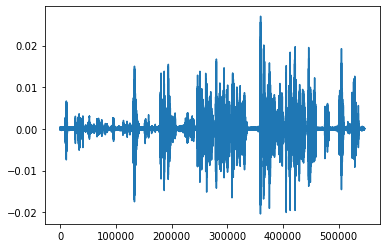

In [18]:
plt.plot(norm_good_x)